In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Read the data file
CC_data = pd.read_csv("test.csv")
# Replace "?" with NaN
CC_data.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
CC_data["Age"] = pd.to_numeric(CC_data["Age"])
# CC_data2 = CC_data[:,:]
CC_data2 = CC_data.copy()


key_data = CC_data["Key"]

In [3]:
CC_data.describe()

Key         Age        Debt  YearsEmployed  CreditScore  \
count  100.000000  100.000000  100.000000     100.000000   100.000000   
mean    50.500000   33.359400    5.639800       3.019150     4.490000   
std     29.011492   11.521954    5.624441       4.039917     8.824318   
min      1.000000   15.830000    0.000000       0.000000     0.000000   
25%     25.750000   23.397500    1.000000       0.500000     0.000000   
50%     50.500000   30.705000    4.125000       1.667500     1.000000   
75%     75.250000   41.252500    9.508750       4.376250     6.000000   
max    100.000000   58.670000   28.000000      28.500000    67.000000   

          ZipCode        Income  
count  100.000000    100.000000  
mean   174.170000   1599.590000  
std    159.721225   6185.926674  
min      0.000000      0.000000  
25%      0.000000      0.000000  
50%    142.500000     26.000000  
75%    260.000000    509.250000  
max    711.000000  50000.000000

In [4]:
CC_data.isnull().sum()

Key               0
Male              1
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
dtype: int64

In [5]:
# Imputing missing values for numerical columns with mean value
CC_data.fillna(CC_data.mean(), inplace=True)

In [6]:
CC_data.tail(10)

Key Male    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
90   91    b  34.17   1.540       u            g             cc         v   
91   92    a  36.00   1.000       u            g              c         v   
92   93    b  25.50   0.375       u            g              m         v   
93   94    b  19.42   6.500       u            g              w         h   
94   95    b  35.17  25.125       u            g              x         h   
95   96    b  52.50   6.500       u            g              k         v   
96   97    b  57.83   7.040       u            g              m         v   
97   98    a  20.75  10.335       u            g             cc         h   
98   99    b  39.92   6.210       u            g              q         v   
99  100    b  25.67  12.500       u            g             cc         v   

    YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
90          1.540            t        t            1              t       g   
91          2.000            t        t           11              f       g   
92          0.250            t        t            3              f       g   
93          1.460            t        t            7              f       g   
94          1.625            t        t            1              t       g   
95          6.290            t        t           15              f       g   
96         14.000            t        t            6              t       g   
97          0.335            t        t            1              t       g   
98          0.040            t        t            1              f       g   
99          1.210            t        t           67              t       g   

    ZipCode  Income  
90      520   50000  
91        0     456  
92      260   15108  
93       80    2954  
94      515     500  
95        0   11202  
96      360    1332  
97       80      50  
98      200     300  
99      140     258

In [7]:

CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
Key               100 non-null int64
Male              99 non-null object
Age               100 non-null float64
Debt              100 non-null float64
Married           100 non-null object
BankCustomer      100 non-null object
EducationLevel    100 non-null object
Ethnicity         100 non-null object
YearsEmployed     100 non-null float64
PriorDefault      100 non-null object
Employed          100 non-null object
CreditScore       100 non-null int64
DriversLicense    100 non-null object
Citizen           100 non-null object
ZipCode           100 non-null int64
Income            100 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 9.0+ KB


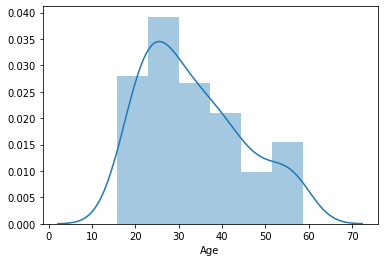

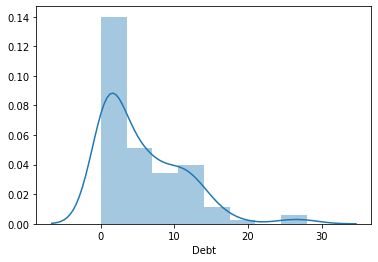

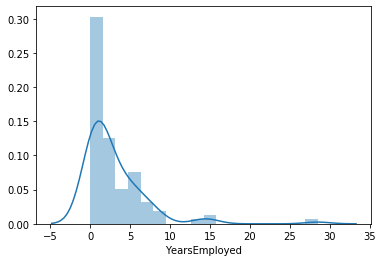

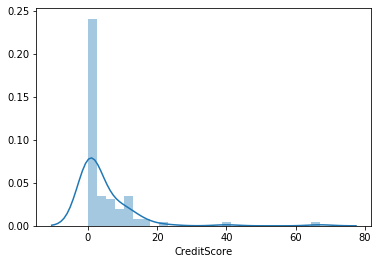

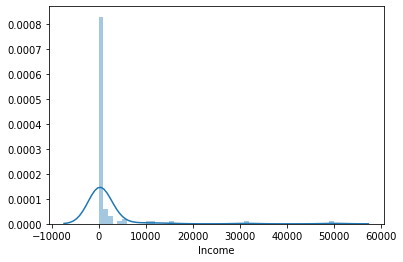

In [8]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(CC_data['Age'])
plotDistPlot(CC_data['Debt'])
plotDistPlot(CC_data['YearsEmployed'])
plotDistPlot(CC_data['CreditScore'])
plotDistPlot(CC_data['Income'])

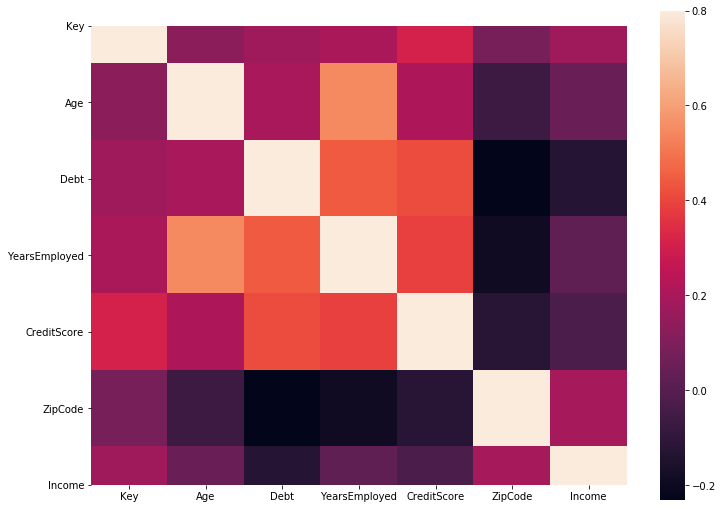

In [9]:
#correlation matrix
corrmat = CC_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

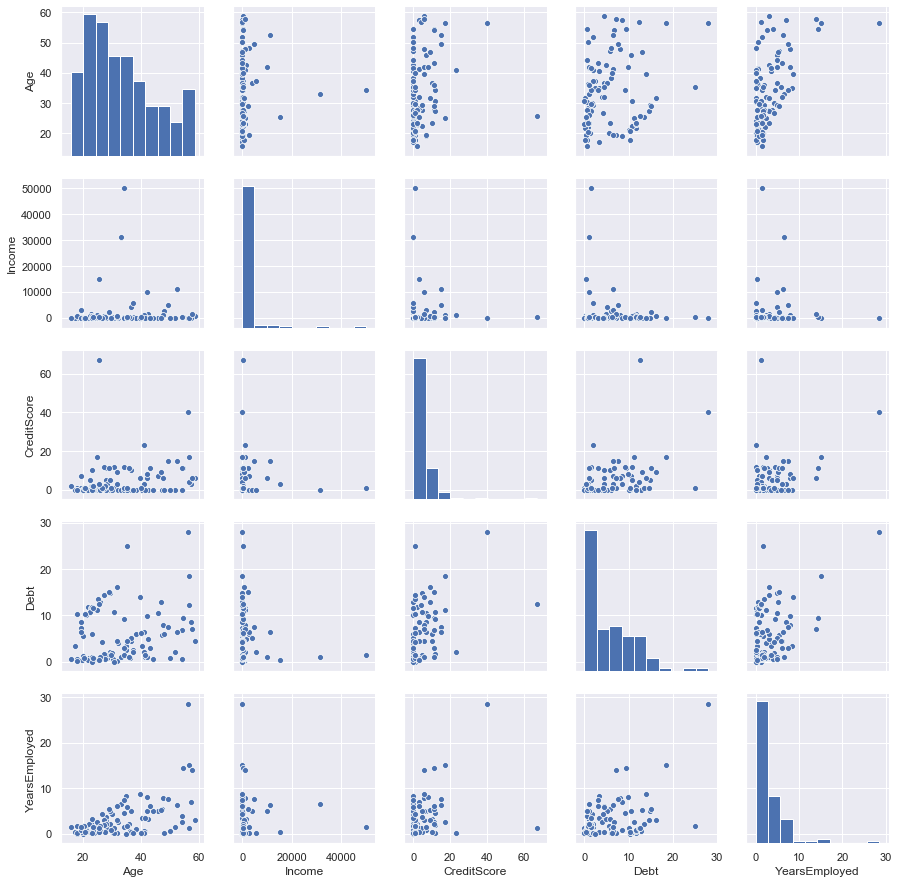

In [10]:
#scatterplot
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(CC_data[cols], size = 2.5)
plt.show();

In [11]:
CC_data.isnull().sum()

Key               0
Male              1
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
dtype: int64

In [12]:
print("shape of the data:", CC_data.shape)


shape of the data: (100, 16)


In [13]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(CC_data)

In [14]:
CC_data.isnull().sum()

Key               0
Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in CC_data:
    if CC_data[col].dtypes=='object':
        CC_data[col]=le.fit_transform(CC_data[col])

In [16]:
CC_data.tail(15)

Key  Male    Age    Debt  Married  BankCustomer  EducationLevel  \
85   86     1  56.75  12.250        0             0               8   
86   87     1  31.67  16.165        0             0               3   
87   88     0  23.42   0.790        1             1               9   
88   89     0  20.42   0.835        0             0               9   
89   90     1  26.67   4.250        0             0               2   
90   91     1  34.17   1.540        0             0               2   
91   92     0  36.00   1.000        0             0               1   
92   93     1  25.50   0.375        0             0               8   
93   94     1  19.42   6.500        0             0              11   
94   95     1  35.17  25.125        0             0              12   
95   96     1  52.50   6.500        0             0               7   
96   97     1  57.83   7.040        0             0               8   
97   98     0  20.75  10.335        0             0               2   
98   99     1  39.92   6.210        0             0               9   
99  100     1  25.67  12.500        0             0               2   

    Ethnicity  YearsEmployed  PriorDefault  Employed  CreditScore  \
85          3          1.250             1         1            4   
86          3          3.000             1         1            9   
87          3          1.500             1         1            2   
88          3          1.585             1         1            1   
89          3          4.290             1         1            1   
90          3          1.540             1         1            1   
91          3          2.000             1         1           11   
92          3          0.250             1         1            3   
93          2          1.460             1         1            7   
94          2          1.625             1         1            1   
95          3          6.290             1         1           15   
96          3         14.000             1         1            6   
97          2          0.335             1         1            1   
98          3          0.040             1         1            1   
99          3          1.210             1         1           67   

    DriversLicense  Citizen  ZipCode  Income  
85               1        0      200       0  
86               0        0      250     730  
87               1        0       80     400  
88               0        0        0       0  
89               1        0      120       0  
90               1        0      520   50000  
91               0        0        0     456  
92               0        0      260   15108  
93               0        0       80    2954  
94               1        0      515     500  
95               0        0        0   11202  
96               1        0      360    1332  
97               1        0       80      50  
98               0        0      200     300  
99               1        0      140     258

In [17]:
from sklearn.model_selection import train_test_split
# Removing the feature which are not important and converting to NumPy array
CC_data = CC_data.drop(['DriversLicense', 'ZipCode'], axis=1)
CC_data = CC_data.values

In [18]:
# Creating new variable to input features and labels
X,y = CC_data[:,0:9] , CC_data[:,9]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [19]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [20]:
rescaledX = scaler.transform(X)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.9


array([[ 5,  2],
       [ 0, 13]], dtype=int64)

Feature ranking:
1. feature 0 (0.526825)
2. feature 8 (0.125144)
3. feature 6 (0.105414)
4. feature 2 (0.099888)
5. feature 3 (0.094686)
6. feature 7 (0.026939)
7. feature 1 (0.007698)
8. feature 5 (0.006811)
9. feature 4 (0.006596)


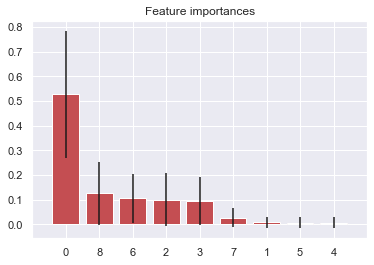

In [22]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [23]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Logistic regression classifier has accuracy of:  0.85


array([[ 4,  3],
       [ 0, 13]], dtype=int64)

In [30]:
y_probs = logreg.predict_proba(rescaledX)
y_class = logreg.predict(rescaledX)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
y_probs = np.delete(y_probs, 0, 1)
y_probs



array([[0.3692929 ],
       [0.37338745],
       [0.32167203],
       [0.39934473],
       [0.45228642],
       [0.67439574],
       [0.43924841],
       [0.47831931],
       [0.3599513 ],
       [0.53771824],
       [0.45769051],
       [0.60573393],
       [0.52059571],
       [0.48766823],
       [0.39610659],
       [0.49145378],
       [0.38439049],
       [0.48976573],
       [0.42373834],
       [0.65998463],
       [0.42678538],
       [0.45952761],
       [0.50215126],
       [0.41391198],
       [0.57470306],
       [0.67402928],
       [0.78486721],
       [0.63588119],
       [0.69539396],
       [0.67676231],
       [0.68413965],
       [0.7272691 ],
       [0.58781294],
       [0.68067934],
       [0.71024757],
       [0.53979193],
       [0.59841965],
       [0.73769769],
       [0.76906778],
       [0.82264639],
       [0.64423819],
       [0.70866127],
       [0.74127724],
       [0.61155272],
       [0.63286637],
       [0.66262504],
       [0.60820207],
       [0.775

In [27]:
# 0 is +, 1 is -
CC_data = np.ravel(y_probs).tolist()

CC_data = np.ravel(y_class).tolist()

In [49]:
#df = pd.DataFrame(CC_data)
df = pd.DataFrame(CC_data, columns = ["Key"])

df['Approved'] = ['+' if x == '0' else '-' for x in df['Key']]

df.to_csv('submission.csv', index = False)